In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib, os, json

print("All libraries loaded")

All libraries loaded


In [2]:
X, y = make_classification(
n_samples=1000,
n_features=20,
n_classes=2,
random_state=42
)


df = pd.DataFrame(X)
df["target"] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,-0.669356,-1.495778,-0.870766,1.141831,0.021606,1.730630,-1.251698,0.289305,0.357163,-0.196811,...,0.154850,-0.219970,-0.739137,1.802012,1.634606,-0.938180,-1.267337,-1.276334,1.016643,1
1,0.093372,0.785848,0.105754,1.272354,-0.846316,-0.979093,1.263707,0.264020,2.411677,-0.960046,...,0.199810,0.288724,0.732492,-0.872002,-1.654887,-1.130204,-0.122709,0.693431,0.911363,0
2,-0.905797,-0.608341,0.295141,0.943716,0.092936,1.370397,-0.064772,0.287273,-0.533004,-0.032504,...,-0.510064,-0.868768,-0.598279,0.019832,0.613460,-1.779439,0.830498,-0.737332,-0.578212,1
3,-0.585793,0.389279,0.698816,0.436236,-0.315082,0.459505,1.448820,0.505558,-1.440982,-1.134020,...,1.466783,0.678728,-1.190917,-1.442381,-0.929136,-0.221600,-0.346772,0.034246,-1.040199,1
4,1.146441,0.515579,-1.222895,-0.396230,-1.293508,-0.352428,0.071254,1.239584,1.007133,-1.479444,...,-0.918127,0.604121,1.068379,-0.882271,2.303639,-0.973379,1.259233,0.360015,1.920368,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)


model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)


pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.895

              precision    recall  f1-score   support

           0       0.85      0.95      0.89        93
           1       0.95      0.85      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



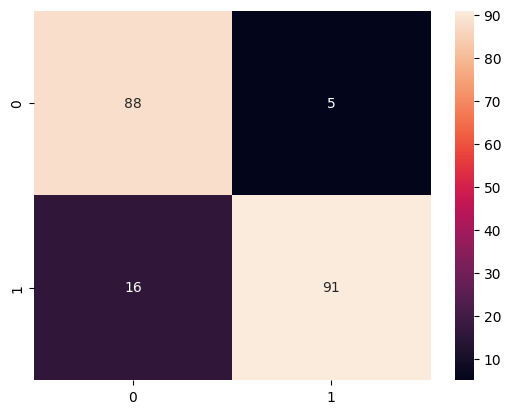

In [4]:
print(classification_report(y_test, pred))


cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [5]:
models_dir = "/home/jovyan/work/models"
os.makedirs(models_dir, exist_ok=True)


joblib.dump(model, models_dir + "/rf_model.joblib")

['/home/jovyan/work/models/rf_model.joblib']

In [6]:
loaded = joblib.load(models_dir + "/rf_model.joblib")
loaded.predict(X_test[:5])

array([1, 1, 0, 1, 1])